Importing needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Downloading Data (use !wget)

In [ ]:
!wget CO2_Emissions.csv /content/drive/MyDrive/CO2_Emissions.csv

--2024-09-30 10:39:03--  http://co2_emissions.csv/
Resolving co2_emissions.csv (co2_emissions.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘co2_emissions.csv’
/content/drive/MyDrive/CO2_Emissions.csv: Scheme missing.


Reading the data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CO2_Emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Selecting features for regression

In [ ]:
cdf = df[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
cdf.head(9)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Plotting **"Emissions"** values with respect to **"Engine size"**

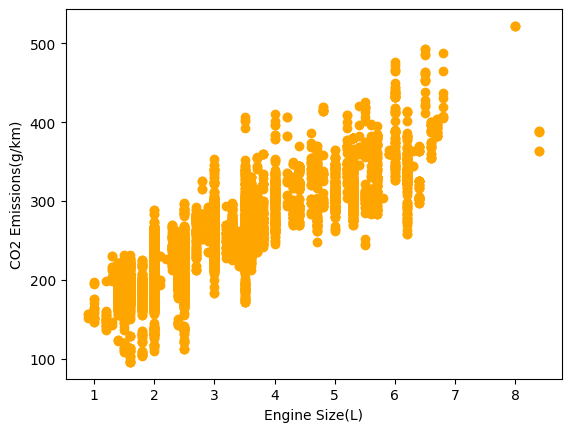

In [ ]:
plt.scatter(cdf['Engine Size(L)'], cdf['CO2 Emissions(g/km)'], color='orange')
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emissions(g/km)")
plt.show()

Creating train and test dataset

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Train data distribution

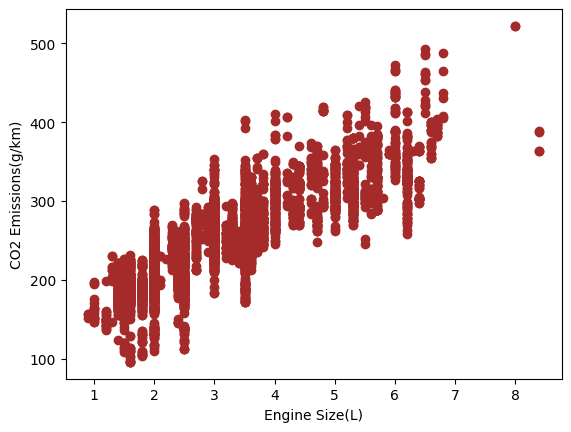

In [ ]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'], color='brown')
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emissions(g/km)")
plt.show()


**Multiple Regression Model**

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)']])
y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)

Coefficients:  [[5.33226966 6.43533187 2.38177273 2.15892352 8.98046884]]


**Prediction**

In [ ]:
y_hat= regr.predict(test[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)']])
x = np.asanyarray(test[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)']])
y = np.asanyarray(test[['CO2 Emissions(g/km)']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 451.37
Variance score: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
